In [1]:
import pandas as pd
import os
import numpy as np

## Merge country datasets together

In [2]:
check_ccb_dir = os.environ.get("CCB_DIR", None)
df_us = pd.read_csv(f'{check_ccb_dir}/source/geolifeclef-2022/observations/observations_us_train.csv', delimiter=";")
df_fr = pd.read_csv(f'{check_ccb_dir}/source/geolifeclef-2022/observations/observations_fr_train.csv', delimiter=";")
df = df_us.append(df_fr)
df

/var/folders/sr/hfqb3lqs569_y4860h3l5zn80000gn/T/ipykernel_93439/3810905329.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_us.append(df_fr)


,observation_id,latitude,longitude,species_id,subset
0,20000173,33.197660,-116.180680,4911,train
1,20000175,34.037968,-118.876755,4912,train
2,20000176,27.620740,-97.222690,4913,train
3,20000177,29.155582,-95.653930,4914,train
4,20000179,36.605740,-121.959510,4915,train
...,...,...,...,...,...
671239,10543820,43.542500,4.967778,1041,train
671240,10304005,43.829823,4.450699,19,train
671241,10433186,43.329414,5.599397,906,train
671242,10352176,43.556637,7.016971,516,train


## Do we have overlapping species in the two countries?

In [3]:
len(set(df_us['species_id']) & set(df_fr['species_id']))

1956

## Calculate `n` most common species in train set

In [4]:
n = 100 # most common in train set
df_train = df.loc[df['subset'] == 'train']
species_counts = df_train['species_id'].value_counts()[:n]
species_counts

5045    6456
3072    5805
2902    4722
5053    3934
3034    3857
        ... 
5247    1370
418     1365
2225    1359
139     1359
869     1358
Name: species_id, Length: 100, dtype: int64

In [5]:
species = species_counts.keys()

## Filter for species

In [6]:
df.loc[df['species_id'].isin(species)]

,observation_id,latitude,longitude,species_id,subset
6,20000182,43.889668,-73.009250,2950,train
8,20000185,31.935776,-108.941570,4918,train
22,20000204,30.416836,-98.045460,2524,train
28,20000211,33.789425,-84.373790,2992,train
29,20000212,46.867200,-96.449640,4936,train
...,...,...,...,...,...
671174,10612529,48.562592,3.013792,886,train
671184,10629793,44.970047,5.149254,185,train
671196,10721898,48.851585,2.363979,129,train
671202,10661298,43.370243,-1.781419,687,train


## Check if all species are represented in val subset

In [7]:
df.loc[(df['species_id'].isin(species)) & (df['subset'] == 'train')]['species_id'].value_counts()

5045    6456
3072    5805
2902    4722
5053    3934
3034    3857
        ... 
5247    1370
418     1365
2225    1359
139     1359
869     1358
Name: species_id, Length: 100, dtype: int64

In [17]:
df.loc[(df['species_id'].isin(species)) & (df['subset'] == 'val')]['species_id'].value_counts()

5045    245
720     142
5612    129
3072    129
2902    124
       ... 
1863     23
340      21
5855     19
5200     16
4991     16
Name: species_id, Length: 100, dtype: int64

## Subsample 10% from training dataset

In [18]:
df_train_species = df.loc[(df['species_id'].isin(species)) & (df['subset'] == 'train')]

In [19]:
df_train_sample = df_train_species.sample(frac=0.1, random_state=1)
df_train_sample

,observation_id,latitude,longitude,species_id,subset
38767,20083678,42.447910,-71.268210,5359,train
742982,21605199,39.492954,-88.176710,553,train
591000,21276352,40.899520,-73.894010,720,train
128676,10421962,47.487385,-0.561821,389,train
69315,10710717,43.235447,1.352631,33,train
...,...,...,...,...,...
526496,21136957,44.065010,-121.310050,5095,train
77972,20168673,38.720116,-77.799034,816,train
656664,21418525,34.128128,-118.212230,5045,train
809667,21750275,37.887920,-122.139885,5143,train


In [20]:
df_train_sample['species_id'].value_counts()

5045    640
3072    594
2902    466
5053    390
3495    384
       ... 
1863    133
4936    132
418     132
5247    116
869     114
Name: species_id, Length: 100, dtype: int64

## Create new dataset and change label enumeration

In [21]:
df_val_species = df.loc[(df['species_id'].isin(species)) & (df['subset'] == 'val')]

In [22]:
df_new = df_train_sample.append(df_val_species)
df_new

/var/folders/sr/hfqb3lqs569_y4860h3l5zn80000gn/T/ipykernel_93439/3643873770.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_train_sample.append(df_val_species)


,observation_id,latitude,longitude,species_id,subset
38767,20083678,42.447910,-71.268210,5359,train
742982,21605199,39.492954,-88.176710,553,train
591000,21276352,40.899520,-73.894010,720,train
128676,10421962,47.487385,-0.561821,389,train
69315,10710717,43.235447,1.352631,33,train
...,...,...,...,...,...
669034,10519854,43.582371,-1.410010,389,val
669254,10127916,43.457775,5.882048,246,val
670006,10426388,44.108685,0.583843,33,val
670034,10543033,43.142288,6.230122,139,val


In [23]:
df_new.to_csv(f'observations_sample_original_labels.csv', index=False, sep=";")

In [24]:
lookup = sorted(list(set(df_new['species_id'])))
def return_index(a):
    return lookup.index(a)

lookup

[5,
 33,
 68,
 71,
 83,
 88,
 115,
 125,
 129,
 131,
 139,
 185,
 223,
 224,
 246,
 325,
 337,
 340,
 389,
 396,
 418,
 440,
 523,
 546,
 553,
 570,
 605,
 653,
 679,
 687,
 692,
 720,
 739,
 774,
 816,
 869,
 886,
 979,
 1041,
 1042,
 1047,
 1075,
 1096,
 1142,
 1155,
 1452,
 1597,
 1863,
 1916,
 2071,
 2076,
 2196,
 2200,
 2225,
 2268,
 2524,
 2821,
 2902,
 2950,
 2971,
 2992,
 3034,
 3064,
 3072,
 3253,
 3495,
 4918,
 4936,
 4940,
 4991,
 4999,
 5020,
 5025,
 5030,
 5045,
 5053,
 5057,
 5068,
 5073,
 5086,
 5095,
 5143,
 5168,
 5189,
 5192,
 5200,
 5207,
 5228,
 5247,
 5270,
 5273,
 5332,
 5352,
 5359,
 5366,
 5421,
 5461,
 5504,
 5612,
 5855]

In [25]:
df_new['species_id'] = df_new['species_id'].map(return_index)

In [26]:
df_new.to_csv(f'observations_sample.csv', index=False, sep=";")

In [27]:
df_labels = pd.read_csv('observations_sample_original_labels.csv', sep=";")
df_labels

,observation_id,latitude,longitude,species_id,subset
0,20083678,42.447910,-71.268210,5359,train
1,21605199,39.492954,-88.176710,553,train
2,21276352,40.899520,-73.894010,720,train
3,10421962,47.487385,-0.561821,389,train
4,10710717,43.235447,1.352631,33,train
...,...,...,...,...,...
27433,10519854,43.582371,-1.410010,389,val
27434,10127916,43.457775,5.882048,246,val
27435,10426388,44.108685,0.583843,33,val
27436,10543033,43.142288,6.230122,139,val


## Create names for species

In [28]:
df_species_names = pd.read_csv(f'{check_ccb_dir}/source/geolifeclef-2022/metadata/species_details.csv', sep=";")

In [29]:
merged_df = df_labels.join(df_species_names.set_index('species_id'), on='species_id')
merged_df

,observation_id,latitude,longitude,species_id,subset,GBIF_species_id,GBIF_species_name,GBIF_genus_name,GBIF_family_name,GBIF_kingdom_name
0,20083678,42.447910,-71.268210,5359,train,1429340,Erythemis simplicicollis,Erythemis,Libellulidae,Animalia
1,21605199,39.492954,-88.176710,553,train,5394163,Taraxacum officinale,Taraxacum,Asteraceae,Plantae
2,21276352,40.899520,-73.894010,720,train,5376075,Alliaria petiolata,Alliaria,Brassicaceae,Plantae
3,10421962,47.487385,-0.561821,389,train,3084015,Phytolacca americana,Phytolacca,Phytolaccaceae,Plantae
4,10710717,43.235447,1.352631,33,train,3089154,Xanthium strumarium,Xanthium,Asteraceae,Plantae
...,...,...,...,...,...,...,...,...,...,...
27433,10519854,43.582371,-1.410010,389,val,3084015,Phytolacca americana,Phytolacca,Phytolaccaceae,Plantae
27434,10127916,43.457775,5.882048,246,val,2926679,Lamium amplexicaule,Lamium,Lamiaceae,Plantae
27435,10426388,44.108685,0.583843,33,val,3089154,Xanthium strumarium,Xanthium,Asteraceae,Plantae
27436,10543033,43.142288,6.230122,139,val,3189767,Plantago major,Plantago,Plantaginaceae,Plantae


In [30]:
sorted_species = merged_df.sort_values(by=['species_id'])['GBIF_species_name']
u, idx = np.unique(sorted_species, return_index=True)
names = u[np.argsort(idx)]

In [38]:
df_names = pd.DataFrame(names, columns=['GBIF_species_name'])

In [39]:
df_names.to_csv(f'names.csv', index=False, sep=";")

In [41]:
df_read_names = pd.read_csv('names.csv', sep=";")
list(df_read_names['GBIF_species_name'])

['Eschscholzia californica',
 'Xanthium strumarium',
 'Rhus typhina',
 'Plantago lanceolata',
 'Gleditsia triacanthos',
 'Foeniculum vulgare',
 'Campsis radicans',
 'Ailanthus altissima',
 'Platanus occidentalis',
 'Hedera helix',
 'Plantago major',
 'Lonicera japonica',
 'Glechoma hederacea',
 'Trifolium repens',
 'Lamium amplexicaule',
 'Callicarpa americana',
 'Lysimachia arvensis',
 'Taxodium distichum',
 'Phytolacca americana',
 'Liriodendron tulipifera',
 'Berberis thunbergii',
 'Ricinus communis',
 'Juglans nigra',
 'Verbascum thapsus',
 'Taraxacum officinale',
 'Daucus carota',
 'Liquidambar styraciflua',
 'Galium aparine',
 'Trifolium pratense',
 'Morus alba',
 'Oenothera speciosa',
 'Alliaria petiolata',
 'Reynoutria japonica',
 'Pteridium aquilinum',
 'Maclura pomifera',
 'Gaillardia pulchella',
 'Vinca major',
 'Acer negundo',
 'Melia azedarach',
 'Ficaria verna',
 'Achillea millefolium',
 'Pinus strobus',
 'Robinia pseudoacacia',
 'Vicia sativa',
 'Cichorium intybus',
 'Po

## Investigate issues on altitude

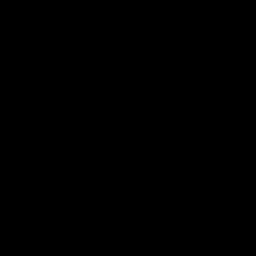

In [1]:
path = "/Volumes/Washington/data/ccb/source/geolifeclef-2022/patches_sample/patches-us/00/00"
file = "20780000_altitude.tif"

from PIL import Image
im = Image.open(path + '/' + file)
im

In [2]:
import numpy as np
imarray = np.array(im)
imarray

array([[23, 23, 23, ..., 22, 22, 22],
       [23, 23, 23, ..., 22, 22, 22],
       [23, 23, 23, ..., 22, 22, 22],
       ...,
       [23, 23, 23, ..., 20, 20, 20],
       [23, 23, 23, ..., 20, 20, 20],
       [23, 23, 23, ..., 20, 20, 20]], dtype=int32)